In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
 
df0 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/0.csv")
df0 = df0.drop(df0.columns[0], axis=1)  

df1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/1.csv")
df1 = df1.drop(df1.columns[0], axis=1)  

df2 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/2.csv")
df2 = df2.drop(df2.columns[0], axis=1)  

df3 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/3.csv")
df3 = df3.drop(df3.columns[0], axis=1)  

df4 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/4.csv")
df4 = df4.drop(df4.columns[0], axis=1)  

d0 = np.array(df0)
d1 = np.array(df1)
d2 = np.array(df2)
d3 = np.array(df3)
d4 = np.array(df4)

In [ ]:
X_train = []
Y_train = []

for i in range(1200):
  X_train.append(d0[i])
  Y_train.append(0)

  X_train.append(d1[i])
  Y_train.append(1)

  X_train.append(d2[i])
  Y_train.append(2)

  X_train.append(d3[i])
  Y_train.append(3)

  X_train.append(d4[i])
  Y_train.append(4)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_test = []
Y_test = []

for i in range(300):
  X_test.append(d0[1200+i])
  Y_test.append(0)

  X_test.append(d1[1200+i])
  Y_test.append(1)

  X_test.append(d2[1200+i])
  Y_test.append(2)

  X_test.append(d3[1200+i])
  Y_test.append(3)

  X_test.append(d4[1200+i])
  Y_test.append(4)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [ ]:
C = [0.001, 0.01, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

model_params = {
    'Support Vector Machine':{
        'model': SVC(),
        'params':{
            'C': C,
            'kernel': kernel
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='f1_micro', 
                                    n_jobs = -1,
                                    n_iter = 15,
                                    cv=5,
                                    verbose=0)
    
    best_model.fit(X_train, Y_train)
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

best_params = pd.DataFrame(scores)
best_params.head()

,model,Best Score,Best Parameter
0,Support Vector Machine,0.5905,"{'kernel': 'poly', 'C': 10}"


In [ ]:
svm = SVC(kernel = 'poly', C = 10)
svm.fit(X_train, Y_train)

SVC(C=10, kernel='poly')

In [ ]:
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1200
           1       0.53      0.39      0.45      1200
           2       0.85      0.87      0.86      1200
           3       0.66      0.65      0.66      1200
           4       0.65      0.74      0.69      1200

    accuracy                           0.65      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.65      0.65      0.65      6000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       300
           1       0.40      0.37      0.38       300
           2       0.83      0.79      0.81       300
           3       0.60      0.66      0.63       300
           4       0.66      0.65      0.66       300

    accuracy                           0.60      1500
   macro avg       0.60      0.60      0.60      1500
weighted avg    

Train CM


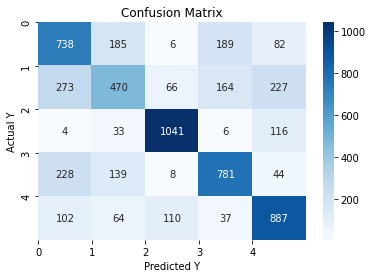





Test CM


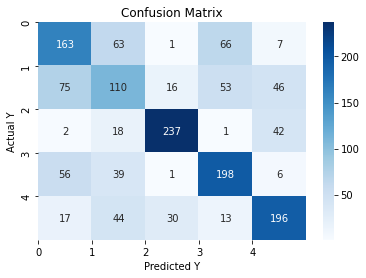

In [ ]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));

plt.show()